In [1]:
import twint
import pandas as pd
import numpy as np
import nest_asyncio
nest_asyncio.apply()

In [2]:
# Initial imports
import os
from pathlib import Path
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
get_ipython().run_line_magic("matplotlib", "inline")

In [5]:
list = ["inflation_guy", "cnbc", "dylanmatt", "bloomberg", "wsj"]
for tweets in list:
    print(list)
    c = twint.Config()
    c.Search = "inflation"
    c.Hide_output = True
    c.Lang= "en"
    c.Pandas = True
    c.Since = "2016-01-01"
    c.near = "united_states"
    c.Limit = 1000
    twint.run.Search(c)
Tweets_df = twint.output.panda.Tweets_df
Tweets_df.head()

['inflation_guy', 'cnbc', 'dylanmatt', 'bloomberg', 'wsj']
['inflation_guy', 'cnbc', 'dylanmatt', 'bloomberg', 'wsj']
['inflation_guy', 'cnbc', 'dylanmatt', 'bloomberg', 'wsj']
['inflation_guy', 'cnbc', 'dylanmatt', 'bloomberg', 'wsj']
['inflation_guy', 'cnbc', 'dylanmatt', 'bloomberg', 'wsj']


,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1442636045619761161,1442259983970807808,1.632786e+12,2021-09-27 19:43:30,-0400,,@ErieNotEerie There was no pause of time with ...,en,[],[],...,,,,,,"[{'screen_name': 'ErieNotEerie', 'name': 'Erie...",,,,
1,1442635943991824393,1441319769274159106,1.632786e+12,2021-09-27 19:43:06,-0400,,@idcryp_to @MercorFinance Regarding sustainabi...,en,[],[],...,,,,,,"[{'screen_name': 'idcryp_to', 'name': 'IDCrypt...",,,,
2,1442635865168048129,1442635865168048129,1.632786e+12,2021-09-27 19:42:47,-0400,,Let’s DO talk about it. I don’t want inflatio...,en,[],[],...,,,,,,[],,,,
3,1442635789985361942,1442532981936164869,1.632786e+12,2021-09-27 19:42:29,-0400,,@Judeet88 @lovelystuff1878 @AndyMcDonaldMP @Ri...,en,"[taxation, inflation]",[],...,,,,,,"[{'screen_name': 'Judeet88', 'name': 'Deesse23...",,,,
4,1442635770590752769,1442635770590752769,1.632786e+12,2021-09-27 19:42:25,-0400,,Sterling Gains Ahead of BoE Meeting - Markets ...,en,[],[],...,,,,,,[],,,,


In [7]:
Tweets_df

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1442636045619761161,1442259983970807808,1.632786e+12,2021-09-27 19:43:30,-0400,,@ErieNotEerie There was no pause of time with ...,en,[],[],...,,,,,,"[{'screen_name': 'ErieNotEerie', 'name': 'Erie...",,,,
1,1442635943991824393,1441319769274159106,1.632786e+12,2021-09-27 19:43:06,-0400,,@idcryp_to @MercorFinance Regarding sustainabi...,en,[],[],...,,,,,,"[{'screen_name': 'idcryp_to', 'name': 'IDCrypt...",,,,
2,1442635865168048129,1442635865168048129,1.632786e+12,2021-09-27 19:42:47,-0400,,Let’s DO talk about it. I don’t want inflatio...,en,[],[],...,,,,,,[],,,,
3,1442635789985361942,1442532981936164869,1.632786e+12,2021-09-27 19:42:29,-0400,,@Judeet88 @lovelystuff1878 @AndyMcDonaldMP @Ri...,en,"[taxation, inflation]",[],...,,,,,,"[{'screen_name': 'Judeet88', 'name': 'Deesse23...",,,,
4,1442635770590752769,1442635770590752769,1.632786e+12,2021-09-27 19:42:25,-0400,,Sterling Gains Ahead of BoE Meeting - Markets ...,en,[],[],...,,,,,,[],,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,1442605444669784066,1442605444669784066,1.632779e+12,2021-09-27 17:41:54,-0400,,The importance of differential equations canno...,en,[],[],...,,,,,,[],,,,
1011,1442605418484682753,1442605418484682753,1.632779e+12,2021-09-27 17:41:48,-0400,,It's going to cost Americans who have savings ...,en,[],[],...,,,,,,[],,,,
1012,1442605397903216643,1442604998702075909,1.632779e+12,2021-09-27 17:41:43,-0400,,@markets Sounds like inflation to me lol,en,[],[],...,,,,,,"[{'screen_name': 'markets', 'name': 'Bloomberg...",,,,
1013,1442605368304037889,1442203586709106689,1.632779e+12,2021-09-27 17:41:36,-0400,,@POTUS Vague. Could you flesh this out. Also i...,en,[],[],...,,,,,,"[{'screen_name': 'POTUS', 'name': 'President B...",,,,


In [8]:
Tweets_df = twint.storage.panda.Tweets_df

In [20]:
Tweets_df

,date,tweet,hashtags,name,nlikes,nreplies,nretweets
0,2021-09-27 19:43:30,@ErieNotEerie There was no pause of time with ...,[],barbara showell,0,0,0
1,2021-09-27 19:43:06,@idcryp_to @MercorFinance Regarding sustainabi...,[],🎓🎓 AMA Professor,0,0,0
2,2021-09-27 19:42:47,Let’s DO talk about it. I don’t want inflatio...,[],Veronica Iverson,0,0,0
3,2021-09-27 19:42:29,@Judeet88 @lovelystuff1878 @AndyMcDonaldMP @Ri...,"[taxation, inflation]",Liz K #GTTO⚡Flyting Socialist #FreeAssangeNOW 🍀🍀,0,0,0
4,2021-09-27 19:42:25,Sterling Gains Ahead of BoE Meeting - Markets ...,[],NonSell.com,0,0,0
...,...,...,...,...,...,...,...
1010,2021-09-27 17:41:54,The importance of differential equations canno...,[],MTZ,1,0,0
1011,2021-09-27 17:41:48,It's going to cost Americans who have savings ...,[],ApoloJedi,1,0,1
1012,2021-09-27 17:41:43,@markets Sounds like inflation to me lol,[],Faraō - Nswt Bjtj / 'Nu Sut Bitty/,0,0,0
1013,2021-09-27 17:41:36,@POTUS Vague. Could you flesh this out. Also i...,[],David Lyons,0,0,0


In [21]:
Tweets_df['hashtags']

0                          []
1                          []
2                          []
3       [taxation, inflation]
4                          []
                ...          
1010                       []
1011                       []
1012                       []
1013                       []
1014                       []
Name: hashtags, Length: 1015, dtype: object

In [22]:
Tweets_df.drop(['id', 'conversation_id', 'created_at', 'timezone', 'place', 'language','cashtags', 'user_id', 'user_id_str','username', 'day', 'hour', 'link', 'urls', 'photos', 'video', 'thumbnail', 'retweet', 'quote_url', 'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'], axis = 1, inplace = True)

KeyError: "['id' 'conversation_id' 'created_at' 'timezone' 'place' 'language'\n 'cashtags' 'user_id' 'user_id_str' 'username' 'day' 'hour' 'link' 'urls'\n 'photos' 'video' 'thumbnail' 'retweet' 'quote_url' 'search' 'near' 'geo'\n 'source' 'user_rt_id' 'user_rt' 'retweet_id' 'reply_to' 'retweet_date'\n 'translate' 'trans_src' 'trans_dest'] not found in axis"

In [23]:
Tweets_df

,date,tweet,hashtags,name,nlikes,nreplies,nretweets
0,2021-09-27 19:43:30,@ErieNotEerie There was no pause of time with ...,[],barbara showell,0,0,0
1,2021-09-27 19:43:06,@idcryp_to @MercorFinance Regarding sustainabi...,[],🎓🎓 AMA Professor,0,0,0
2,2021-09-27 19:42:47,Let’s DO talk about it. I don’t want inflatio...,[],Veronica Iverson,0,0,0
3,2021-09-27 19:42:29,@Judeet88 @lovelystuff1878 @AndyMcDonaldMP @Ri...,"[taxation, inflation]",Liz K #GTTO⚡Flyting Socialist #FreeAssangeNOW 🍀🍀,0,0,0
4,2021-09-27 19:42:25,Sterling Gains Ahead of BoE Meeting - Markets ...,[],NonSell.com,0,0,0
...,...,...,...,...,...,...,...
1010,2021-09-27 17:41:54,The importance of differential equations canno...,[],MTZ,1,0,0
1011,2021-09-27 17:41:48,It's going to cost Americans who have savings ...,[],ApoloJedi,1,0,1
1012,2021-09-27 17:41:43,@markets Sounds like inflation to me lol,[],Faraō - Nswt Bjtj / 'Nu Sut Bitty/,0,0,0
1013,2021-09-27 17:41:36,@POTUS Vague. Could you flesh this out. Also i...,[],David Lyons,0,0,0


In [57]:
#Download Vader/Update the VADER Lexicon
nltk.download("vader_lexicon")

#Initiate the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\afuen\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [24]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [25]:
# Sentiment scores dictionaries
tweet_sent = {
    "tweet_compound": [],
    "tweet_pos": [],
    "tweet_neu": [],
    "tweet_neg": [],
    "tweet_sent": [],

}

# Get sentiment for the text and the title
for index, row in Tweets_df.iterrows():
    try:
        # Sentiment scoring with VADER
        tweet_sentiment = analyzer.polarity_scores(row["tweet"])
        tweet_sent["tweet_compound"].append(tweet_sentiment["compound"])
        tweet_sent["tweet_pos"].append(tweet_sentiment["pos"])
        tweet_sent["tweet_neu"].append(tweet_sentiment["neu"])
        tweet_sent["tweet_neg"].append(tweet_sentiment["neg"])
        tweet_sent["tweet_sent"].append(get_sentiment(tweet_sentiment["compound"]))

    
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
tweet_sentiment_df = pd.DataFrame(tweet_sent)
tweet_sentiment_df.head()

,tweet_compound,tweet_pos,tweet_neu,tweet_neg,tweet_sent
0,0.0772,0.078,0.857,0.065,1
1,0.4404,0.116,0.884,0.000,1
2,0.0772,0.061,0.939,0.000,1
3,0.3802,0.224,0.776,0.000,1
4,0.0772,0.079,0.852,0.069,1


,tweet_compound,tweet_pos,tweet_neu,tweet_neg,tweet_sent
0,0.0772,0.078,0.857,0.065,1
1,0.4404,0.116,0.884,0.000,1
2,0.0772,0.061,0.939,0.000,1
3,0.3802,0.224,0.776,0.000,1
4,0.0772,0.079,0.852,0.069,1


In [55]:
def join_dataframes(df1,df2): 
    df1=df1.join(df2)
    return df1

In [56]:
Tweets_dataframe=join_dataframes(Tweets_df, tweet_sentiment_df)
Tweets_dataframe.columns

Index(['date', 'tweet', 'hashtags', 'name', 'nlikes', 'nreplies', 'nretweets',
       'tweet_compound', 'tweet_pos', 'tweet_neu', 'tweet_neg', 'tweet_sent'],
      dtype='object')

In [50]:
Tweets_dataframe.drop(['hashtags', 'name', 'nlikes', 'nreplies', 'nretweets'], axis = 1, inplace = True)

In [51]:
Tweets_dataframe.head()

,date,tweet,tweet_compound,tweet_pos,tweet_neu,tweet_neg,tweet_sent
0,2021-09-27 19:43:30,@ErieNotEerie There was no pause of time with ...,0.0772,0.078,0.857,0.065,1
1,2021-09-27 19:43:06,@idcryp_to @MercorFinance Regarding sustainabi...,0.4404,0.116,0.884,0.000,1
2,2021-09-27 19:42:47,Let’s DO talk about it. I don’t want inflatio...,0.0772,0.061,0.939,0.000,1
3,2021-09-27 19:42:29,@Judeet88 @lovelystuff1878 @AndyMcDonaldMP @Ri...,0.3802,0.224,0.776,0.000,1
4,2021-09-27 19:42:25,Sterling Gains Ahead of BoE Meeting - Markets ...,0.0772,0.079,0.852,0.069,1


<AxesSubplot:title={'center':'Twint Tweets Sentiment Comparison'}>

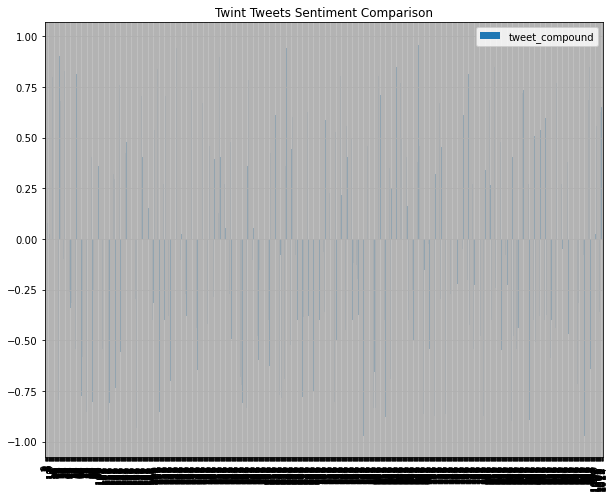

In [54]:
Tweets_dataframe.plot(
    y=["tweet_compound"],
    kind="bar",
    title="Twint Tweets Sentiment Comparison",
    figsize=(10, 8),
    grid=True,
)

In [61]:
# Use the `heatmap` function from the seaborn library to visualize correlations
import seaborn as sns

In [62]:
inflation_correlation = Tweets_dataframe.corr()

<AxesSubplot:>

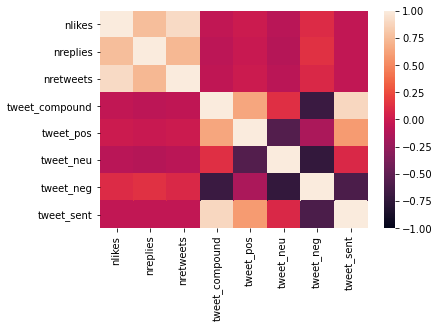

In [63]:
sns.heatmap(inflation_correlation, vmin=-1, vmax=1)